## HW 1 is due on 02/01/2024 at 11:59 PM
## Instructions

1) Label your homework solutions with your ISU idnumber ( first 4 digits), such as HW1_Solutions_3938. This HW will be peer + Instructor graded.

2) Deliverables: You need to submit 3 files.
* ipython notebook file with all of your solutions and codes
* HTML file of your ipython notebook file.
* Your HW solution in a pdf file. Please write this part of the solution in a research paper format: Give a proper title, solve each problems and write findings so that you tell a story with the data set you have and the problems you need to solve. Attach plots, figures,  wherever necessary. 
 
3) Special instructions on how to solve the HW problems.
* For each problem, begin by solving it independently to the best of your ability. You can use ChatGPT, Google Bard, or other AI tools to seek hints, guidance, or alternative approaches to the problems. Engage these AI tools to enhance your understanding and explore different solution strategies.

* After completing all the problems, reflect on your experience by summarizing how you used ChatGPT/Bard or other AI tools, the specific problems you sought help with, and the valuable insights they offered. Discuss the strengths and limitations of both your initial solutions and the AI-generated ones for each of the problems. This integrated approach helps you leverage AI's power while refining your own analytical skills. It's not just about getting the answer; it's about learning through the process!

4) To submit your homework solutions, go to our course in Canvas --> Assignments --> HW 1 --> Submit Assignment --> Click "Choose File" --> choose the HTML file you saved --> Click another file--> choose ipynb file--> Repeat this process to add a pdf file--submit. Once you submit, download and check to ensure that you have submitted the correct files.

5) <font color='red'> WARNING: Your submission will be compared against other students' solutions and online databases to check for plagiarism. Disclosure of this assignment and assignment answers to anybody or any website is a contributory infringement of academic dishonesty at ISU. Do not share or post course materials without the express written consent of the copyright holder and instructor. The class will follow Iowa State University’s policy on academic dishonesty. Anyone suspected of academic dishonesty will be reported to the Dean of Students Office.</font>

## Points:  $\bf 20\times 5  = 100$

We will be using the Iowa Liquor Sales Data Set. Please go to https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy/data_preview and download the Iowa Liquor Sales data set. It may take some time for you to download, upload, and process the functions based on your internet speed and computer, as it is a big data set with several million rows. When you do the following problems, you may run into issues related to the computer memory, time etc. Sampling data randomly by taking any fraction of the data from 30% to 100% based on how much your computer can handle is okay. Some numerical answers may be different for different students because of the sampling above ( which is fine with me), but the process is more important for you to go through for this homework. 

### Problem 1. 
Upload the Iowa Liquor Sales ( ILS) Data Set (and do the following. 
* Show the head and the tail of the data set. Find the dimension of the data set. What % did you have to sample( if any)? 
* Do all the columns( variables) have correct data type labels? If not, find out which ones do not and correct their daya types. 
* Find out how many missing values each of the columns has. For the rest of the columns with missing values, imput in the missing values by the mode of each column.
* Make a list of all the remaining columns. Read the Python Enhancement Proposal (https://peps.python.org/pep-0008/#function-and-variable-names) and use the variable naming convention to change the names of the columns of the data.
* Extract the year, month, and days of the week (i.e., Sunday, Monday, etc) and add the corresponding columns to the data with appropriate column names.

( When you do all the above with the ILS data, you can rename it to anything you like or keep it the same.)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import warnings
import matplotlib.pyplot as plt
import re

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, silhouette_score


warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# ILS data path
data_loc = "/Users/gabrielvictorgomesferreira/Library/Mobile Documents/com~apple~CloudDocs/Work/ISU Classes/MIS 546 - Advanced Business Analytics/Data/"

# File nme
ils_file_name = "ils30.csv"

In [3]:
# Read data
ils_data = pd.read_csv(data_loc + ils_file_name)

# Size it down to 30%
ils_data_sample = ils_data.sample(frac=0.3, random_state=42)

### Show the head and the tail of the data set. Find the dimension of the data set. What % did you have to sample( if any)? 

In [4]:
# Head of the data
ils_data_sample.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
1956169,RINV-05018600024,12/11/2023,4698,QUALITY QUICK STOP / FAIRFIELD,201 WEST BURLINGTIN AVE.,FAIRFIELD,52556,POINT (-91.965393979 41.006794),NaN,JEFFERSON,1022200.0,100% AGAVE TEQUILA,619.0,CAMPARI AMERICA,87619,ESPOLON BLANCO,12,750,16.00,24.00,-6,-144.00,-4.50,-1.18
7424748,S27341700031,08/17/2015,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53.0,JONES,1062300.0,FLAVORED RUM,35.0,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3,42.75,3.00,0.79
4761513,S06461900038,07/09/2012,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52.0,JOHNSON,1012100.0,CANADIAN WHISKIES,65.0,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6,80.28,10.50,2.77
6956398,INV-07548000052,10/02/2017,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66.0,MITCHELL,1041100.0,AMERICAN DRY GINS,55.0,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1,4.98,0.75,0.20
5897768,S17673000080,03/03/2014,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57.0,LINN,1031200.0,VODKA FLAVORED,260.0,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3,37.11,2.25,0.59


In [5]:
# Tail of the data
ils_data_sample.tail()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
7904024,INV-43995500016,01/21/2022,5425,SPIRITS LIQUOR / GRIMES,109 E 1ST ST. # B,GRIMES,50111.0,NaN,77.0,POLK,1701100.0,TEMPORARY & SPECIALTY PACKAGES,578.0,S&B FARMS DISTILLERY,26231,SIR WINSTON WHEAT,6,750,21.23,31.85,2,63.70,1.50,0.39
1404882,INV-59311300009,06/12/2023,10120,BP / WELTON,2576 190TH STREET,WELTON,52774.0,POINT (-90.591619998 41.902480988),NaN,CLINTON,1062500.0,FLAVORED RUM,370.0,PERNOD RICARD USA,42676,MALIBU PASSION FRUIT,12,750,8.99,13.49,3,40.47,2.25,0.59
7321015,INV-12003100025,05/10/2018,4091,FAREWAY STORES #705 / CLEAR LAKE,910 HWY 18 W,CLEAR LAKE,50428.0,POINT (-93.613385 43.105949),17.0,CERRO GORDO,1011600.0,STRAIGHT RYE WHISKIES,255.0,INFINIUM SPIRITS,27102,TEMPLETON 4YR RYE,6,750,18.09,27.14,3,81.42,2.25,0.59
7478538,INV-20506500014,07/09/2019,5054,CORK 'N BOTTLE / MANCHESTER,900 E MAIN ST,MANCHESTER,52087.0,POINT (-91.445038 42.484073),28.0,DELAWARE,1031100.0,AMERICAN VODKAS,55.0,SAZERAC NORTH AMERICA,35948,FLEISCHMANN'S ROYAL VODKA 80 PRF,6,1750,6.50,9.75,6,58.50,10.50,2.77
2572358,INV-13464600021,07/26/2018,2130,SYCAMORE CONVENIENCE,617 SYCAMORE,WATERLOO,50703.0,POINT (-92.335358 42.497854),7.0,BLACK HAWK,1041100.0,AMERICAN DRY GINS,55.0,SAZERAC NORTH AMERICA,29287,BARTON GIN,12,1000,3.92,5.88,12,70.56,12.00,3.17


In [6]:
# Dimension of the data
ils_data_sample.shape

(2535874, 24)

### Do all the columns( variables) have correct data type labels? If not, find out which ones do not and correct their data types. 

In [7]:
# Print data type of the columns
print(ils_data_sample.dtypes)

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number            float64
Vendor Name               object
Item Number               object
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object


In [8]:
## Co3rrecting column data types:
# Date: Converting from object to datetime.
# Store Location: Currently an unusable object, will split into two columns: 'latitude' and 'longitude'.
# County Number: Converting from float to integer.
# Category: Converting from float to integer.
# Vendor Number: Converting from float to integer.
 
## Apply data type changes

# To Integer
for col in ["County Number", "Category", "Vendor Number"]:
    ils_data_sample[col] = ils_data_sample[col].astype("Int64")

# To datetime
ils_data_sample['Date'] = pd.to_datetime(ils_data_sample['Date'])

# Split into lat and long
ils_data_sample['coordenates'] = ils_data_sample['Store Location'].str.extract(r'POINT \(([^)]+)\)')
ils_data_sample[['latitude', 'longitude']] = ils_data_sample['coordenates'].str.split(' ', expand=True).astype(float)
ils_data_sample = ils_data_sample.drop(columns='coordenates')

# Print data type of the columns
print(ils_data_sample.dtypes)

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                     Int64
County                           object
Category                          Int64
Category Name                    object
Vendor Number                     Int64
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
latitude                        float64


#### What % did you have to sample( if any)?
I sampled 30% of the dataset and used the random_state functionality for reproducibility.

### Find out how many missing values each of the columns has. For the rest of the columns with missing values, imput in the missing values by the mode of each column.

In [9]:
# Finding how many missing values each column has
missing_values = ils_data_sample.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

Address             7488
City                7488
Zip Code            7494
Store Location    225184
County Number     363685
County             14484
Category            1452
Category Name       2173
Vendor Number          1
Vendor Name            1
latitude          225184
longitude         225184
dtype: int64


In [10]:
# Filling missing values of each column with its mode
for col in missing_values.index:
    mode_val = ils_data_sample[col].mode()[0]
    ils_data_sample[col] = ils_data_sample[col].fillna(mode_val)

# Check if there's any missing values left
missing_values = ils_data_sample.isnull().sum()
print(missing_values)

Invoice/Item Number      0
Date                     0
Store Number             0
Store Name               0
Address                  0
City                     0
Zip Code                 0
Store Location           0
County Number            0
County                   0
Category                 0
Category Name            0
Vendor Number            0
Vendor Name              0
Item Number              0
Item Description         0
Pack                     0
Bottle Volume (ml)       0
State Bottle Cost        0
State Bottle Retail      0
Bottles Sold             0
Sale (Dollars)           0
Volume Sold (Liters)     0
Volume Sold (Gallons)    0
latitude                 0
longitude                0
dtype: int64


### Make a list of all the remaining columns. Read the Python Enhancement Proposal (https://peps.python.org/pep-0008/#function-and-variable-names) and use the variable naming convention to change the names of the columns of the data.


In [11]:
# List of column names
ils_data_sample.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)',
       'latitude', 'longitude'],
      dtype='object')

In [12]:
# Create function to format the column names
def format_column(col_name):

    # Convert to lower case
    col_name = col_name.lower()

    # Convert anything that is not in A-Z | 0-9 to _
    col_name = re.sub(r'[^a-z0-9]+', '_', col_name).strip("_")

    return col_name

# Apply function
ils_data_sample.columns = [format_column(col) for col in ils_data_sample.columns]

# List with updated column names
ils_data_sample.columns

Index(['invoice_item_number', 'date', 'store_number', 'store_name', 'address',
       'city', 'zip_code', 'store_location', 'county_number', 'county',
       'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'latitude',
       'longitude'],
      dtype='object')

In [13]:
ils_data_sample.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude
1956169,RINV-05018600024,2023-12-11,4698,QUALITY QUICK STOP / FAIRFIELD,201 WEST BURLINGTIN AVE.,FAIRFIELD,52556,POINT (-91.965393979 41.006794),77,JEFFERSON,1022200,100% AGAVE TEQUILA,619,CAMPARI AMERICA,87619,ESPOLON BLANCO,12,750,16.00,24.00,-6,-144.00,-4.50,-1.18,-91.965394,41.006794
7424748,S27341700031,2015-08-17,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53,JONES,1062300,FLAVORED RUM,35,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3,42.75,3.00,0.79,-91.281344,42.108275
4761513,S06461900038,2012-07-09,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52,JOHNSON,1012100,CANADIAN WHISKIES,65,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6,80.28,10.50,2.77,-91.518868,41.676095
6956398,INV-07548000052,2017-10-02,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66,MITCHELL,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1,4.98,0.75,0.20,-92.811539,43.285134
5897768,S17673000080,2014-03-03,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57,LINN,1031200,VODKA FLAVORED,260,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3,37.11,2.25,0.59,-91.609780,41.976835


### Extract the year, month, and days of the week (i.e., Sunday, Monday, etc) and add the corresponding columns to the data with appropriate column names.

In [78]:
# Extract date features
ils_data_sample['year'] = ils_data_sample['date'].dt.year
ils_data_sample['month'] = ils_data_sample['date'].dt.month
ils_data_sample['month_name'] = ils_data_sample['date'].dt.month_name()
ils_data_sample['day'] = ils_data_sample['date'].dt.day
ils_data_sample['day_name'] = ils_data_sample['date'].dt.day_name()

ils_data_sample.tail()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,month_name
7904024,INV-43995500016,2022-01-21,5425,SPIRITS LIQUOR / GRIMES,109 E 1ST ST. # B,GRIMES,50111.0,POINT (-93.596754 41.554101),77,POLK,1701100,TEMPORARY & SPECIALTY PACKAGES,578,S&B FARMS DISTILLERY,26231,SIR WINSTON WHEAT,6,750,21.23,31.85,2,63.70,1.50,0.39,-93.596754,41.554101,2022,1,21,Friday,January
1404882,INV-59311300009,2023-06-12,10120,BP / WELTON,2576 190TH STREET,WELTON,52774.0,POINT (-90.591619998 41.902480988),77,CLINTON,1062500,FLAVORED RUM,370,PERNOD RICARD USA,42676,MALIBU PASSION FRUIT,12,750,8.99,13.49,3,40.47,2.25,0.59,-90.591620,41.902481,2023,6,12,Monday,June
7321015,INV-12003100025,2018-05-10,4091,FAREWAY STORES #705 / CLEAR LAKE,910 HWY 18 W,CLEAR LAKE,50428.0,POINT (-93.613385 43.105949),17,CERRO GORDO,1011600,STRAIGHT RYE WHISKIES,255,INFINIUM SPIRITS,27102,TEMPLETON 4YR RYE,6,750,18.09,27.14,3,81.42,2.25,0.59,-93.613385,43.105949,2018,5,10,Thursday,May
7478538,INV-20506500014,2019-07-09,5054,CORK 'N BOTTLE / MANCHESTER,900 E MAIN ST,MANCHESTER,52087.0,POINT (-91.445038 42.484073),28,DELAWARE,1031100,AMERICAN VODKAS,55,SAZERAC NORTH AMERICA,35948,FLEISCHMANN'S ROYAL VODKA 80 PRF,6,1750,6.50,9.75,6,58.50,10.50,2.77,-91.445038,42.484073,2019,7,9,Tuesday,July
2572358,INV-13464600021,2018-07-26,2130,SYCAMORE CONVENIENCE,617 SYCAMORE,WATERLOO,50703.0,POINT (-92.335358 42.497854),7,BLACK HAWK,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,29287,BARTON GIN,12,1000,3.92,5.88,12,70.56,12.00,3.17,-92.335358,42.497854,2018,7,26,Thursday,July


( When you do all the above with the ILS data, you can rename it to anything you like or keep it the same.)

In [79]:
# Declare data directory
ils_processed_file_name = "ils30_one_third.csv"

ils_data_sample.to_csv(data_loc + ils_processed_file_name, index=False)

In [16]:
# # Sampling the dataset 
# ils_data_sample = ils_data.sample(frac=0.3, random_state=42)

# # To Integer
# for col in ["County Number", "Category", "Vendor Number"]:
#     ils_data_sample[col] = ils_data_sample[col].astype("Int64")

# # To datetime
# ils_data_sample['Date'] = pd.to_datetime(ils_data_sample['Date'])

# # Split into lat and long
# ils_data_sample['coordenates'] = ils_data_sample['Store Location'].str.extract(r'POINT \(([^)]+)\)')
# ils_data_sample[['latitude', 'longitude']] = ils_data_sample['coordenates'].str.split(' ', expand=True).astype(float)
# ils_data_sample = ils_data_sample.drop(columns='coordenates')

# # Filling missing values of each column with its mode
# for col in missing_values.index:
#     mode_val = ils_data_sample[col].mode()[0]
#     ils_data_sample[col] = ils_data_sample[col].fillna(mode_val)

# # Create function to format the column names
# def format_column(col_name):

#     # Convert to lower case
#     col_name = col_name.lower()

#     # Convert anything that is not in A-Z | 0-9 to _
#     col_name = re.sub(r'[^a-z0-9]+', '_', col_name).strip("_")

#     return col_name

# # Apply function
# ils_data_sample.columns = [format_column(col) for col in ils_data_sample.columns]

# # Extract date features
# ils_data_sample['year'] = ils_data_sample['date'].dt.year
# ils_data_sample['month'] = ils_data_sample['date'].dt.month
# ils_data_sample['month_name'] = ils_data_sample['date'].dt.month_name()
# ils_data_sample['day'] = ils_data_sample['date'].dt.day
# ils_data_sample['day_name'] = ils_data_sample['date'].dt.day_name()

### Problem 2. 
Continuing with the cleaned data set you obtained in problem 1, do the following.
* The data should have 99 counties from Iowa. How do you verify this? If there is something wrong with the number of counties, fix it.
* What is the average profit margin (percentage) for each sale? Could you explain how you find it?
* Which day and month do Iowans frequent Liquor stores the most number of times? Has this changed over the years?
* The news  (https://k923.fm/which-iowa-counties-excessively-drink-the-most-alcohol/) reported in August 2023 that:  
"Both Dubuque and Buchanan counties reported having 27% of adults who are considered to be excessive drinkers. Both these eastern Iowa counties beat out the state average by 2%. Some counties weren't too far behind as Palo Alto, Boone, Carroll, Chickasaw, Winneshiek, and Lee, all reported 26% of adults being excessive drinkers."  
If you were to verify this using the ILS data you have, how do you go about it? Explain and prove the above, True or False.
* What are the top three selling Vodkas, Whiskies, and flavored liquors ( Liqueurs and Cordials) by year?

In [80]:
# dataset file name
ils_processed_file_name = "ils30_one_third.csv"

# Read dataset in
ils_processed = pd.read_csv(data_loc + ils_processed_file_name)
ils_processed['date'] = pd.to_datetime(ils_processed['date'])

ils_processed.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,month_name
0,RINV-05018600024,2023-12-11,4698,QUALITY QUICK STOP / FAIRFIELD,201 WEST BURLINGTIN AVE.,FAIRFIELD,52556,POINT (-91.965393979 41.006794),77,JEFFERSON,1022200,100% AGAVE TEQUILA,619,CAMPARI AMERICA,87619,ESPOLON BLANCO,12,750,16.00,24.00,-6,-144.00,-4.50,-1.18,-91.965394,41.006794,2023,12,11,Monday,December
1,S27341700031,2015-08-17,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53,JONES,1062300,FLAVORED RUM,35,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3,42.75,3.00,0.79,-91.281344,42.108275,2015,8,17,Monday,August
2,S06461900038,2012-07-09,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52,JOHNSON,1012100,CANADIAN WHISKIES,65,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6,80.28,10.50,2.77,-91.518868,41.676095,2012,7,9,Monday,July
3,INV-07548000052,2017-10-02,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66,MITCHELL,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1,4.98,0.75,0.20,-92.811539,43.285134,2017,10,2,Monday,October
4,S17673000080,2014-03-03,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57,LINN,1031200,VODKA FLAVORED,260,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3,37.11,2.25,0.59,-91.609780,41.976835,2014,3,3,Monday,March


### The data should have 99 counties from Iowa. How do you verify this? If there is something wrong with the number of counties, fix it.

In [19]:
print("Number of counties in Iowa: ", ils_processed['county'].nunique())
ils_processed['county'].unique()

Number of counties in Iowa:  99


array(['JEFFERSON', 'JONES', 'JOHNSON', 'MITCHELL', 'LINN',
       'POTTAWATTAMIE', 'CERRO GORDO', 'WASHINGTON', 'POLK', 'BLACK HAWK',
       'MARION', 'STORY', 'POWESHIEK', 'HANCOCK', 'BOONE', 'WINNESHIEK',
       'VAN BUREN', 'FLOYD', 'MONTGOMERY', 'MAHASKA', 'SCOTT', 'LYON',
       'MUSCATINE', 'WOODBURY', 'BUENA VISTA', 'MADISON', 'WINNEBAGO',
       'KOSSUTH', 'WAPELLO', 'DECATUR', 'LEE', 'CARROLL', 'FAYETTE',
       'WEBSTER', 'CLAY', 'UNION', 'CLINTON', 'MONONA', 'DALLAS',
       'DES MOINES', 'DUBUQUE', 'IOWA', 'HOWARD', 'JASPER', 'RINGGOLD',
       'DICKINSON', 'SIOUX', 'PALO ALTO', 'HARDIN', 'PLYMOUTH', 'CLAYTON',
       'IDA', 'TAYLOR', 'BREMER', 'DELAWARE', 'CRAWFORD', 'ALLAMAKEE',
       "O'BRIEN", 'HARRISON', 'GUTHRIE', 'MARSHALL', 'WORTH', 'GREENE',
       'SAC', 'BENTON', 'WARREN', 'PAGE', 'AUDUBON', 'GRUNDY', 'CEDAR',
       'BUCHANAN', 'TAMA', 'HAMILTON', 'CHEROKEE', 'JACKSON', 'APPANOOSE',
       'BUTLER', 'HENRY', 'LUCAS', 'OSCEOLA', 'HUMBOLDT', 'CASS',
       'CHIC

### What is the average profit margin (percentage) for each sale? Could you explain how you find it?

In [105]:
# Calculate the sale cost
ils_processed['sale_cost'] = ils_processed['bottles_sold'] * ils_processed['state_bottle_cost']

# Take the profit margin
ils_processed['profit_percentage'] = ((ils_processed['sale_dollars'] -  ils_processed['sale_cost']) / ils_processed['sale_cost']) * 100


# ils_processed = ils_processed[ils_processed['bottles_sold'] != 0]
ils_processed.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,month_name,alcohol_category,sale_cost,profit_percentage
0,RINV-05018600024,2023-12-11,4698,QUALITY QUICK STOP / FAIRFIELD,201 WEST BURLINGTIN AVE.,FAIRFIELD,52556,POINT (-91.965393979 41.006794),77,JEFFERSON,1022200,100% AGAVE TEQUILA,619,CAMPARI AMERICA,87619,ESPOLON BLANCO,12,750,16.00,24.00,-6,-144.00,-4.50,-1.18,-91.965394,41.006794,2023,12,11,Monday,December,Tequila,-96.00,50.000000
1,S27341700031,2015-08-17,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53,JONES,1062300,FLAVORED RUM,35,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3,42.75,3.00,0.79,-91.281344,42.108275,2015,8,17,Monday,August,Rum,28.50,50.000000
2,S06461900038,2012-07-09,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52,JOHNSON,1012100,CANADIAN WHISKIES,65,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6,80.28,10.50,2.77,-91.518868,41.676095,2012,7,9,Monday,July,Whiskey,53.52,50.000000
3,INV-07548000052,2017-10-02,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66,MITCHELL,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1,4.98,0.75,0.20,-92.811539,43.285134,2017,10,2,Monday,October,Gin,3.32,50.000000
4,S17673000080,2014-03-03,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57,LINN,1031200,VODKA FLAVORED,260,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3,37.11,2.25,0.59,-91.609780,41.976835,2014,3,3,Monday,March,Vodka,24.75,49.939394


In [106]:
ils_processed['profit_percentage'].mean()

inf

In [107]:
# Check if there are any rows where bottles_sold is zero
zero_bottles_sold = ils_processed[ils_processed['bottles_sold'] == 0]
print(zero_bottles_sold.shape)
zero_bottles_sold

(2, 34)


,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,month_name,alcohol_category,sale_cost,profit_percentage
609194,INV-12453700001,2018-06-05,9911,SOUTHERN GLAZERS WINE & SPIRITS OF IOWA,3100 SE GRIMES BLVD. STE 100,GRIMES,50111.0,POINT (-93.774496 41.657621),77,POLK,1012300,SINGLE MALT SCOTCH,370,PERNOD RICARD USA,5153,GLENLIVET FOUNDERS RESERVE,12,750,19.98,29.97,0,359.64,0.06,0.01,-93.774496,41.657621,2018,6,5,Tuesday,June,Other,0.0,inf
2247981,INV-00016600079,2016-08-29,2573,HY-VEE FOOD STORE / MUSCATINE,2400 2ND AVE,MUSCATINE,52761,POINT (-91.035138 41.451349),70,MUSCATINE,1032000,IMPORTED VODKAS,239,RUSSIAN STANDARD VODKA,35109,RUSSIAN STANDARD,12,750,10.00,15.00,0,180.00,0.56,0.14,-91.035138,41.451349,2016,8,29,Monday,August,Vodka,0.0,inf


There's null values in the bottles_sold column, and that's not acceptable because it will prevent us to compute the average profit margin because we can't have null values in the denominator.

In [108]:
# remediating bottles_sold == 0
ils_processed['bottles_sold'] = np.where(((ils_processed['bottles_sold'] == 0) 
                                             & (ils_processed['sale_dollars'] != 0) 
                                             & (ils_processed['state_bottle_retail'] != 0)), 
                                             (ils_processed['sale_dollars']/ils_processed['state_bottle_retail']), 
                                             ils_processed['bottles_sold'])
ils_processed = ils_processed[ils_processed['bottles_sold'] != 0]

# Recaculating profit margin
ils_processed['sale_cost'] = ils_processed['bottles_sold'] * ils_processed['state_bottle_cost']
ils_processed['profit_percentage'] = ((ils_processed['sale_dollars'] -  ils_processed['sale_cost']) / ils_processed['sale_cost']) * 100

# Display average profit margin per sell
round(ils_processed['profit_percentage'].mean(), 2)

51.09

### Which day and month do Iowans frequent Liquor stores the most number of times? Has this changed over the years?

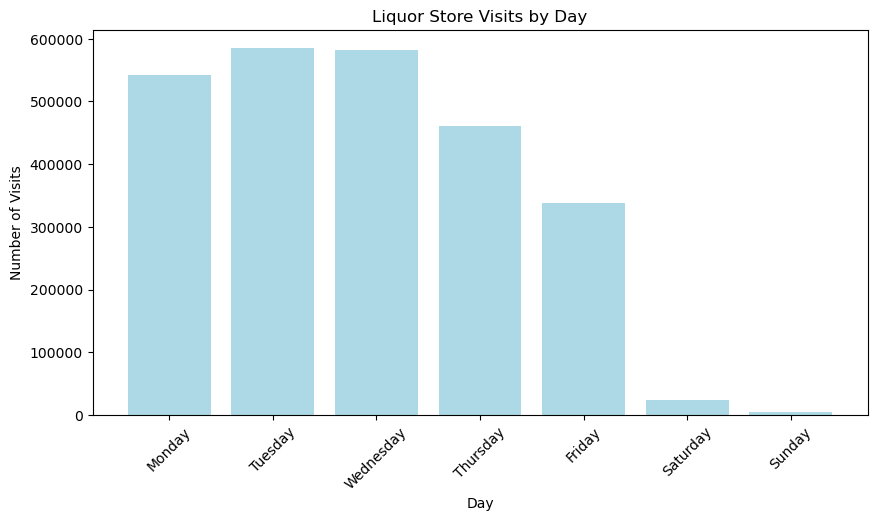

In [109]:
## Liquor Store Visits by Day

# Group data by day_name and count occurrences
grouped_data_day = ils_processed.groupby('day_name').size().reset_index(name='count')

# Define order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Apply the custom order to the day_name column
grouped_data_day['day_name'] = pd.Categorical(grouped_data_day['day_name'], categories=day_order, ordered=True)

# Sort the data based on the custom day order
grouped_data_day = grouped_data_day.sort_values('day_name')

# Plot the data after grouping
plt.figure(figsize=(10, 5))
plt.bar(grouped_data_day['day_name'], grouped_data_day['count'], color='lightblue')
plt.title('Liquor Store Visits by Day')
plt.xlabel('Day')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()


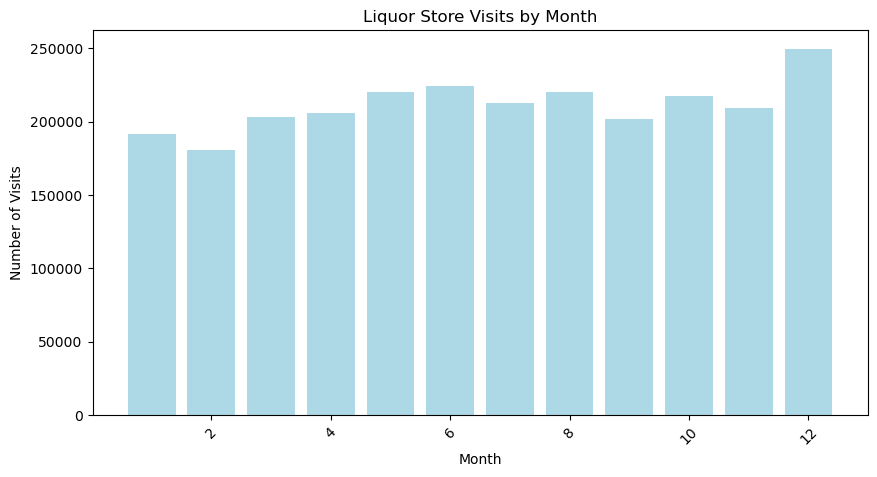

In [110]:
## Liquor Store Visits by Month

# Group data by month and count occurrences
grouped_data_day = ils_processed.groupby('month').size().reset_index(name='count')


# Plot the data after grouping
plt.figure(figsize=(10, 5))
plt.bar(grouped_data_day['month'], grouped_data_day['count'], color='lightblue')
plt.title('Liquor Store Visits by Month')
plt.xlabel('Month')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()


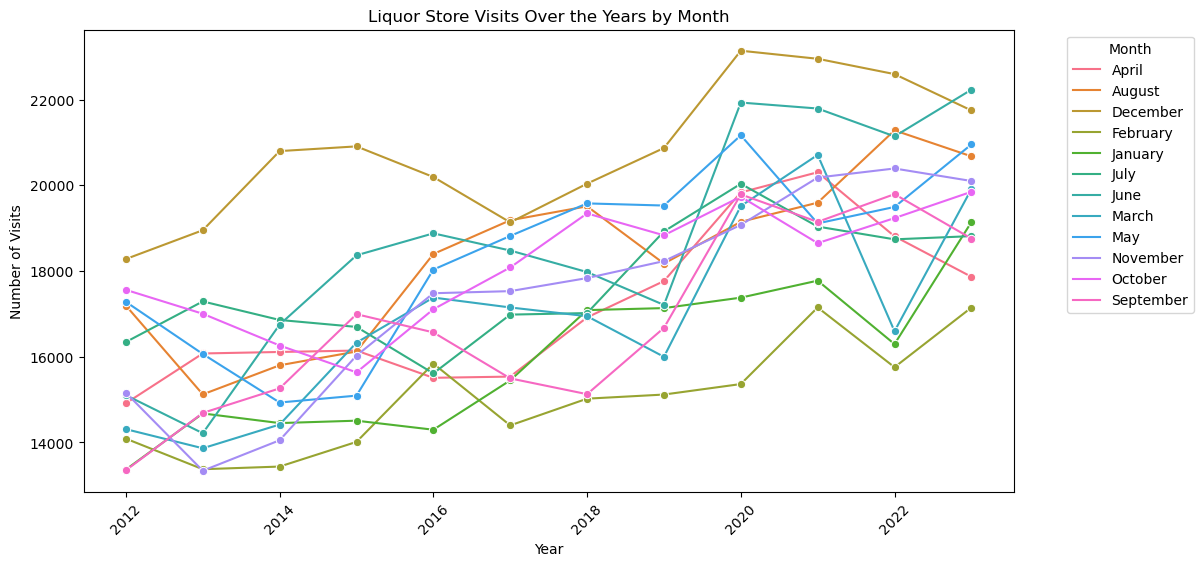

In [111]:
## Liquor Store Visits Over the Years by Month

# Group by year and month and count the number of records (visits)
grouped_data = ils_processed.groupby(['year', 'month_name']).size().reset_index(name='visit_count')

# Plot the number of visits by year and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='visit_count', hue='month_name', marker='o')
plt.title('Liquor Store Visits Over the Years by Month')
plt.ylabel('Number of Visits')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


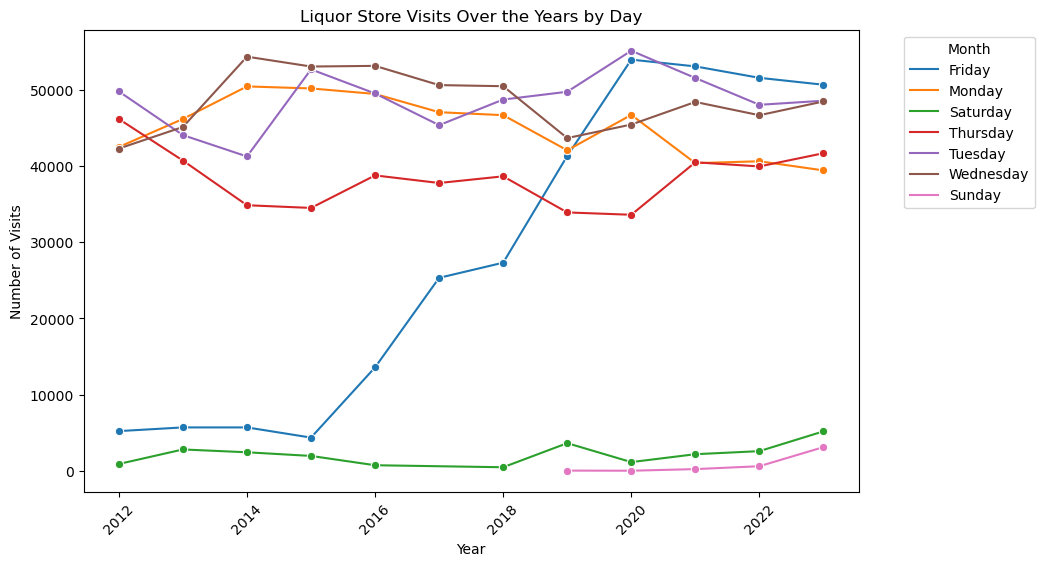

In [112]:
## Liquor Store Visits Over the Years by Day

# Group by year and month and count the number of records (visits)
grouped_data = ils_processed.groupby(['year', 'day_name']).size().reset_index(name='visit_count')

# Plot the number of visits by year and month
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='year', y='visit_count', hue='day_name', marker='o')
plt.title('Liquor Store Visits Over the Years by Day')
plt.ylabel('Number of Visits')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### The news  (https://k923.fm/which-iowa-counties-excessively-drink-the-most-alcohol/) reported in August 2023 that:  
"Both Dubuque and Buchanan counties reported having 27% of adults who are considered to be excessive drinkers. Both these eastern Iowa counties beat out the state average by 2%. Some counties weren't too far behind as Palo Alto, Boone, Carroll, Chickasaw, Winneshiek, and Lee, all reported 26% of adults being excessive drinkers."  
If you were to verify this using the ILS data you have, how do you go about it? Explain and prove the above, True or False.

In [113]:
# Get equivalent data they had at that point
excessive_df = ils_processed[ils_processed['date'] <= '2023-08-31']

excessive_df.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,month_name,alcohol_category,sale_cost,profit_percentage
1,S27341700031,2015-08-17,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53,JONES,1062300,FLAVORED RUM,35,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3.0,42.75,3.00,0.79,-91.281344,42.108275,2015,8,17,Monday,August,Rum,28.50,50.000000
2,S06461900038,2012-07-09,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52,JOHNSON,1012100,CANADIAN WHISKIES,65,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6.0,80.28,10.50,2.77,-91.518868,41.676095,2012,7,9,Monday,July,Whiskey,53.52,50.000000
3,INV-07548000052,2017-10-02,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66,MITCHELL,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1.0,4.98,0.75,0.20,-92.811539,43.285134,2017,10,2,Monday,October,Gin,3.32,50.000000
4,S17673000080,2014-03-03,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57,LINN,1031200,VODKA FLAVORED,260,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3.0,37.11,2.25,0.59,-91.609780,41.976835,2014,3,3,Monday,March,Vodka,24.75,49.939394
5,INV-07136100008,2017-09-08,3477,SAM'S CLUB 6472 / COUNCIL BLUFFS,3221 MANAWA CENTRE DR,COUNCIL BLUFFS,51501.0,POINT (-95.847163 41.225208),78,POTTAWATTAMIE,1032100,IMPORTED VODKAS,115,CONSTELLATION BRANDS INC,34821,SVEDKA VODKA,6,1750,13.00,19.50,60.0,1170.00,105.00,27.74,-95.847163,41.225208,2017,9,8,Friday,September,Vodka,780.00,50.000000


In [114]:
count_sold_liters = excessive_df.groupby(['county'])['volume_sold_liters'].sum().sort_values(ascending=False).reset_index()
count_sold_liters

,county,volume_sold_liters
0,POLK,4774331.94
1,LINN,2009590.61
2,SCOTT,1498140.54
3,JOHNSON,1240278.72
4,BLACK HAWK,1221492.89
...,...,...
94,WAYNE,10696.52
95,ADAMS,9463.62
96,DAVIS,9443.33
97,TAYLOR,9167.36


In [115]:
state_sold_liters = ils_processed['volume_sold_liters'].sum()
state_sold_liters


23250235.02000001

In [116]:
# Compute county average sales
count_sold_liters['county_sales_percentage'] = (count_sold_liters['volume_sold_liters'] / state_sold_liters) * 100
count_sold_liters

,county,volume_sold_liters,county_sales_percentage
0,POLK,4774331.94,20.534553
1,LINN,2009590.61,8.643313
2,SCOTT,1498140.54,6.443550
3,JOHNSON,1240278.72,5.334478
4,BLACK HAWK,1221492.89,5.253680
...,...,...,...
94,WAYNE,10696.52,0.046006
95,ADAMS,9463.62,0.040703
96,DAVIS,9443.33,0.040616
97,TAYLOR,9167.36,0.039429


In [117]:
count_sold_liters[(count_sold_liters['county'] == "DUBUQUE") | (count_sold_liters['county'] == "BUCHANAN")]

,county,volume_sold_liters,county_sales_percentage
8,DUBUQUE,694591.49,2.987460
40,BUCHANAN,101153.15,0.435063


In [118]:
# Calculate the average sold_gallons per county
avg_sold_gallons_per_county = round((100 / 99) * 100 - 100, 2)
avg_sold_gallons_per_county

1.01

Based on the available ILS data, which only provides transactional sales volumes by county, it is not possible to verify the news report's claim regarding excessive drinking rates. The dataset lacks necessary demographic data, such as the number of adults in each county, which is required to calculate per capita consumption and compare it to the state average. Therefore, the analysis cannot conclusively confirm or refute the report's findings.

### What are the top three selling Vodkas, Whiskies, and flavored liquors ( Liqueurs and Cordials) by year?

In [119]:
ils_processed['category_name'].unique()

array(['100% AGAVE TEQUILA', 'FLAVORED RUM', 'CANADIAN WHISKIES',
       'AMERICAN DRY GINS', 'VODKA FLAVORED', 'IMPORTED VODKAS',
       'SPICED RUM', 'SCOTCH WHISKIES', 'VODKA 80 PROOF',
       'AMERICAN CORDIALS & LIQUEURS', 'STRAIGHT RYE WHISKIES', 'TEQUILA',
       'AMERICAN VODKAS', 'AMERICAN BRANDIES', 'MIXTO TEQUILA',
       'IRISH WHISKIES', 'IMPORTED FLAVORED VODKA', 'AMERICAN SCHNAPPS',
       'STRAIGHT BOURBON WHISKIES', 'GOLD RUM',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED BRANDIES',
       'WHISKEY LIQUEUR', 'AMERICAN GRAPE BRANDIES', 'TENNESSEE WHISKIES',
       'AMERICAN ALCOHOL', 'IMPORTED SCHNAPPS', 'WHITE RUM',
       '100 PROOF VODKA', 'BLENDED WHISKIES', 'MISCELLANEOUS SCHNAPPS',
       'GRAPE SCHNAPPS', 'COCKTAILS/RTD',
       'MISC. AMERICAN CORDIALS & LIQUEURS', 'AMERICAN FLAVORED VODKA',
       'IMPORTED CORDIALS & LIQUEURS', 'PUERTO RICO & VIRGIN ISLANDS RUM',
       'IMPORTED DRY GINS', 'CREAM LIQUEURS', 'BUTTERSCOTCH SCHNAPPS',
       'SPECIAL O

In [120]:
# Create a function to categorize the products into broader categories
def categorize_alcohol(category_name):
    category_name = category_name.upper()  # Ensure case-insensitive matching
    if 'VODKA' in category_name:
        return 'Vodka'
    elif 'WHISKEY' in category_name or 'WHISKIES' in category_name or 'BOURBON' in category_name or 'RYE' in category_name:
        return 'Whiskey'
    elif 'RUM' in category_name:
        return 'Rum'
    elif 'LIQUEURS' in category_name or 'CORDIALS' in category_name or 'SCHNAPPS' in category_name:
        return 'Liqueurs/Cordials'
    elif 'TEQUILA' in category_name:
        return 'Tequila'
    elif 'GIN' in category_name:
        return 'Gin'
    elif 'BRANDIES' in category_name:
        return 'Brandy'
    else:
        return 'Other'

# Apply the function to create a new column 'alcohol_category'
ils_processed['alcohol_category'] = ils_processed['category_name'].apply(categorize_alcohol)

# Check the result
print(ils_processed[['category_name', 'alcohol_category']].head(10))


                  category_name   alcohol_category
0            100% AGAVE TEQUILA            Tequila
1                  FLAVORED RUM                Rum
2             CANADIAN WHISKIES            Whiskey
3             AMERICAN DRY GINS                Gin
4                VODKA FLAVORED              Vodka
5               IMPORTED VODKAS              Vodka
6                    SPICED RUM                Rum
7               SCOTCH WHISKIES            Whiskey
8                VODKA 80 PROOF              Vodka
9  AMERICAN CORDIALS & LIQUEURS  Liqueurs/Cordials


In [121]:
# Group data per 'category_name', 'item_description', and 'year'
category_year_sales = ils_processed.groupby(['category_name', 'item_description', 'year'])['bottles_sold'].sum().reset_index()
category_year_sales = category_year_sales.sort_values(by=['year', 'bottles_sold'], ascending=[False, False])

# Display the result
category_year_sales


,category_name,item_description,year,bottles_sold
28940,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY,2023,278112.0
6892,AMERICAN VODKAS,TITOS HANDMADE VODKA,2023,161589.0
8358,CANADIAN WHISKIES,BLACK VELVET,2023,98414.0
6243,AMERICAN VODKAS,HAWKEYE VODKA,2023,65948.0
28968,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI SLEEVE,2023,62185.0
...,...,...,...,...
17437,MISC. AMERICAN CORDIALS & LIQUEURS,DEKUYPER MIXOLOGIST GINGER,2012,1.0
17474,MISC. AMERICAN CORDIALS & LIQUEURS,HIRAM WALKER ORANGE CURACAO,2012,1.0
17740,MISC. IMPORTED CORDIALS & LIQUEURS,COURVOISIER GOLD MINI,2012,1.0
28061,VODKA FLAVORED,360 MANDARIN ORANGE VODKA MINI,2012,1.0


In [122]:
# Apply the function to create a new column 'alcohol_category'
category_year_sales['alcohol_category'] = category_year_sales['category_name'].apply(categorize_alcohol)
category_year_sales.sort_values(by=['alcohol_category', 'year', 'bottles_sold'], ascending=[True, False, False])

# Grab the top 3 items for each alcohol category
top_3_selling_per_category = category_year_sales.groupby(['alcohol_category','year']).head(3).sort_values(by=['year', 'alcohol_category', 'bottles_sold'], ascending=[True, False, False]).reset_index(drop=True)

top_3_selling_per_category = top_3_selling_per_category[['year', 'alcohol_category', 'category_name', 'item_description', 'bottles_sold']].sort_values(by=['year', 'alcohol_category', 'bottles_sold'], ascending=[False, False, False])
top_3_selling_per_category.head(20)

,year,alcohol_category,category_name,item_description,bottles_sold
264,2023,Whiskey,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY,278112.0
265,2023,Whiskey,CANADIAN WHISKIES,BLACK VELVET,98414.0
266,2023,Whiskey,WHISKEY LIQUEUR,FIREBALL CINNAMON WHISKEY MINI SLEEVE,62185.0
267,2023,Vodka,AMERICAN VODKAS,TITOS HANDMADE VODKA,161589.0
268,2023,Vodka,AMERICAN VODKAS,HAWKEYE VODKA,65948.0
269,2023,Vodka,AMERICAN VODKAS,MCCORMICK 80PRF VODKA PET,54765.0
270,2023,Tequila,MIXTO TEQUILA,JOSE CUERVO ESPECIAL REPOSADO,19000.0
271,2023,Tequila,100% AGAVE TEQUILA,PATRON SILVER,17468.0
272,2023,Tequila,MIXTO TEQUILA,JOSE CUERVO ESPECIAL SILVER,14011.0
273,2023,Rum,SPICED RUM,CAPTAIN MORGAN ORIGINAL SPICED,51344.0


In [123]:
question_cat = ['Vodka', 'Whiskey', 'Liqueurs/Cordials']
to_pivot_df = top_3_selling_per_category[top_3_selling_per_category['alcohol_category'].isin(question_cat)]

# Pivoting the DataFrame
pivot_df = to_pivot_df.pivot_table(index=['alcohol_category','item_description'], columns='year', values='bottles_sold')
pivot_df

year                                                        2012     2013  \
alcohol_category  item_description                                          
Liqueurs/Cordials 99 BANANAS                                 NaN      NaN   
                  DEKUYPER LUSCIOUS PEACHTREE                NaN      NaN   
                  DR MCGILLICUDDYS CHERRY                    NaN      NaN   
                  DR. MCGILLICUDDY'S CHERRY SCHNAPPS         NaN  12129.0   
                  FIREBALL CINNAMON                          NaN      NaN   
                  JAGERMEISTER LIQUEUR                   27154.0  23930.0   
                  KINKY LIQUEUR                          16991.0      NaN   
                  RUMCHATA                               24505.0  17758.0   
Vodka             ABSOLUT SWEDISH VODKA 80 PRF               NaN      NaN   
                  BARTON VODKA                           25386.0      NaN   
                  FIVE O'CLOCK VODKA                     46056.0  49274.0   
                  HAWKEYE VODKA                          71843.0  74024.0   
                  MCCORMICK 80PRF VODKA PET                  NaN      NaN   
                  SMIRNOFF VODKA 80 PRF                      NaN  27136.0   
                  TITOS HANDMADE VODKA                       NaN      NaN   
Whiskey           BLACK VELVET                           88112.0  88713.0   
                  CROWN ROYAL                                NaN      NaN   
                  CROWN ROYAL CANADIAN WHISKY            23265.0      NaN   
                  CROWN ROYAL REGAL APPLE                    NaN      NaN   
                  FIREBALL CINNAMON                          NaN      NaN   
                  FIREBALL CINNAMON WHISKEY                  NaN  25610.0   
                  FIREBALL CINNAMON WHISKEY MINI SLEEVE      NaN      NaN   
                  JACK DANIELS OLD #7 BLACK LBL          34816.0  34053.0   

year                                                        2014      2015  \
alcohol_category  item_description                                           
Liqueurs/Cordials 99 BANANAS                                 NaN       NaN   
                  DEKUYPER LUSCIOUS PEACHTREE                NaN       NaN   
                  DR MCGILLICUDDYS CHERRY                    NaN       NaN   
                  DR. MCGILLICUDDY'S CHERRY SCHNAPPS     11886.0   10578.0   
                  FIREBALL CINNAMON                          NaN       NaN   
                  JAGERMEISTER LIQUEUR                   20206.0   18779.0   
                  KINKY LIQUEUR                              NaN       NaN   
                  RUMCHATA                               12129.0   10551.0   
Vodka             ABSOLUT SWEDISH VODKA 80 PRF               NaN       NaN   
                  BARTON VODKA                           27902.0   30620.0   
                  FIVE O'CLOCK VODKA                     46222.0   46259.0   
                  HAWKEYE VODKA                          74348.0   73394.0   
                  MCCORMICK 80PRF VODKA PET                  NaN       NaN   
                  SMIRNOFF VODKA 80 PRF                      NaN       NaN   
                  TITOS HANDMADE VODKA                       NaN       NaN   
Whiskey           BLACK VELVET                           98475.0  104210.0   
                  CROWN ROYAL                                NaN       NaN   
                  CROWN ROYAL CANADIAN WHISKY                NaN       NaN   
                  CROWN ROYAL REGAL APPLE                    NaN       NaN   
                  FIREBALL CINNAMON                          NaN       NaN   
                  FIREBALL CINNAMON WHISKEY              45814.0   44111.0   
                  FIREBALL CINNAMON WHISKEY MINI SLEEVE      NaN       NaN   
                  JACK DANIELS OLD #7 BLACK LBL          34685.0   38771.0   

year                                                         2016      2017  \
alcohol_category  item_description          

### Problem 3. 
Continuing with the data set obtained in problem 1, solve the following. These problems involve plotting. Make sure to use proper titles, labels, legends, and plot size to make your plot better.
* Analyze annual trends in average and median liquor sales in Iowa from 2012 to 2023. Use line charts to visualize changes over the years. Investigate the impact of the COVID-19 pandemic on sales during 2019-2021.

* How do the monthly patterns of liquor sales in Iowa vary when visualizing the total volume sold (in Liters) with a horizontal bar plot? Furthermore, what insights can be gained from a vertical bar plot depicting the distribution of average sales (in Dollars) by days? 
* Discover the top 10 counties in Iowa with the highest and lowest number of bottles sold. Use a pie chart to visualize the distribution, providing insights into both significant contributors and areas with lower sales among the counties.
* Create a scatter plot visualizing the relationship between 'State Bottle Retail' and 'Volume Sold (Gallons)' in Iowa liquor sales. Explore the correlation between these two columns to understand if and how they are related. 
* Let $Q1, Q3,$ and $IQR$ be the first quartile, third quartile and the interquartile range. Any data point lower than $Q1 - 1.5 IQR$ or higher than $Q3 + 1.5 IQR$ is an outlier. Using this formula, find two numerical variables that have the highest number of outliers. Use the box plot to verify that what you just saw is correct.

### Analyze annual trends in average and median liquor sales in Iowa from 2012 to 2023. Use line charts to visualize changes over the years. Investigate the impact of the COVID-19 pandemic on sales during 2019-2021.

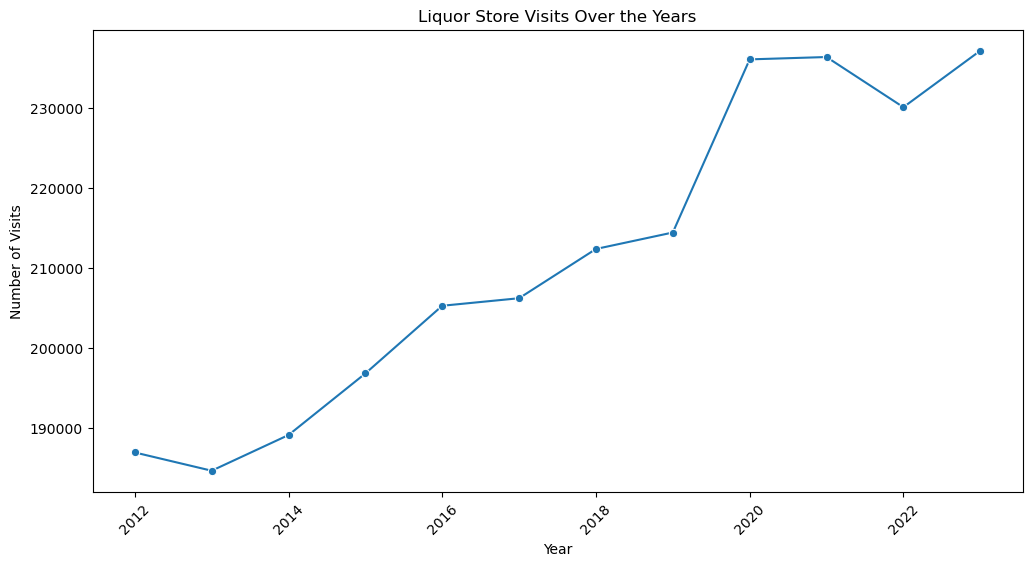

In [124]:
# Group by year and month and count the number of records
grouped_data = ils_processed.groupby(['year']).size().reset_index(name='visit_count')

# Plot the number of visits by year and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='visit_count', marker='o')
plt.title('Liquor Store Visits Over the Years')
plt.ylabel('Number of Visits')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


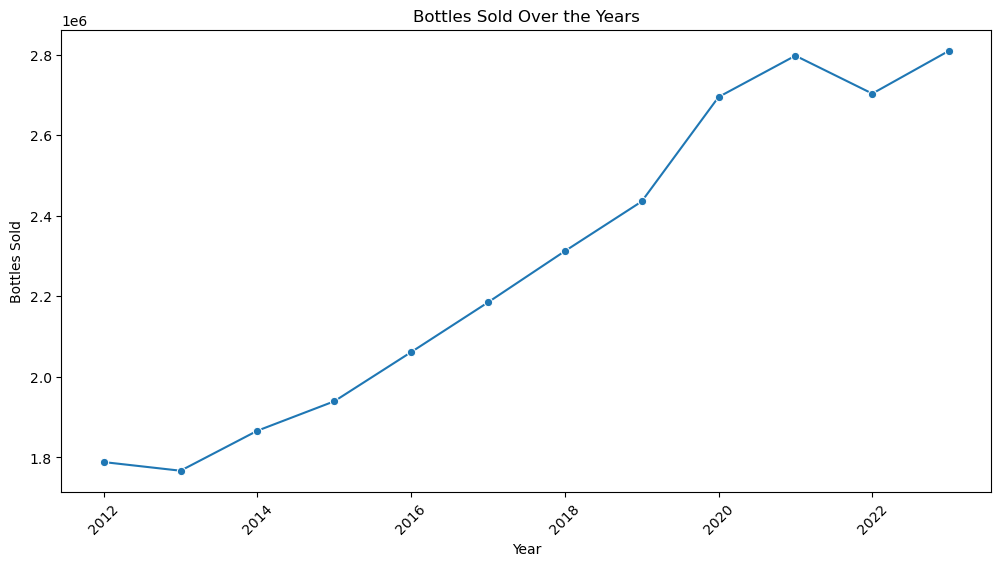

In [125]:
# Group by year and month and count the number of records
grouped_data = ils_processed.groupby(['year'])['bottles_sold'].sum().reset_index(name='visit_count')

# Plot the number of visits by year and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='visit_count', marker='o')
plt.title('Bottles Sold Over the Years')
plt.ylabel('Bottles Sold')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


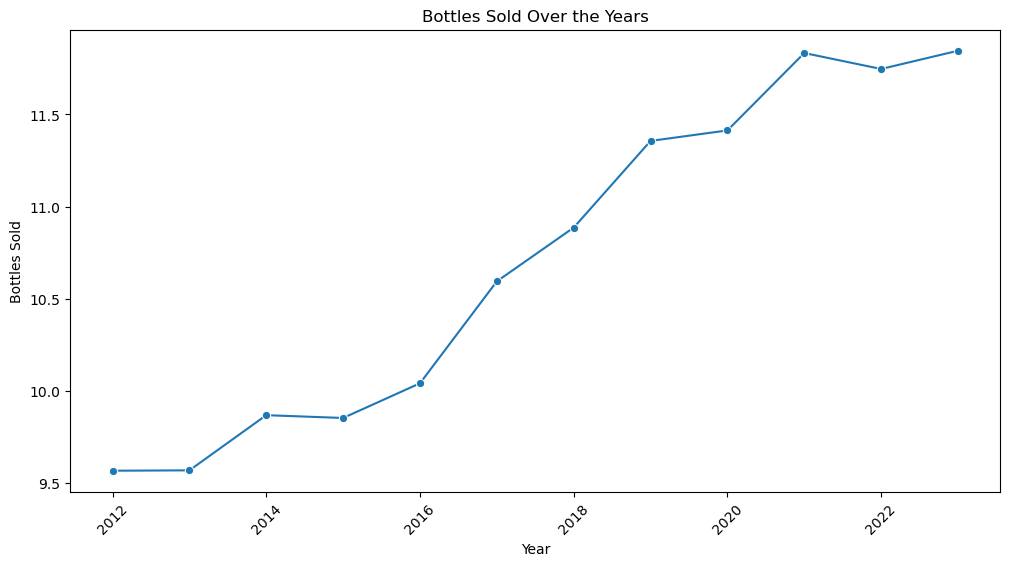

In [126]:
# Group by year and month and count the number of records
grouped_data = ils_processed.groupby(['year'])['bottles_sold'].mean().reset_index(name='visit_count')

# Plot the number of visits by year and month
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='year', y='visit_count', marker='o')
plt.title('Bottles Sold Over the Years')
plt.ylabel('Bottles Sold')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()


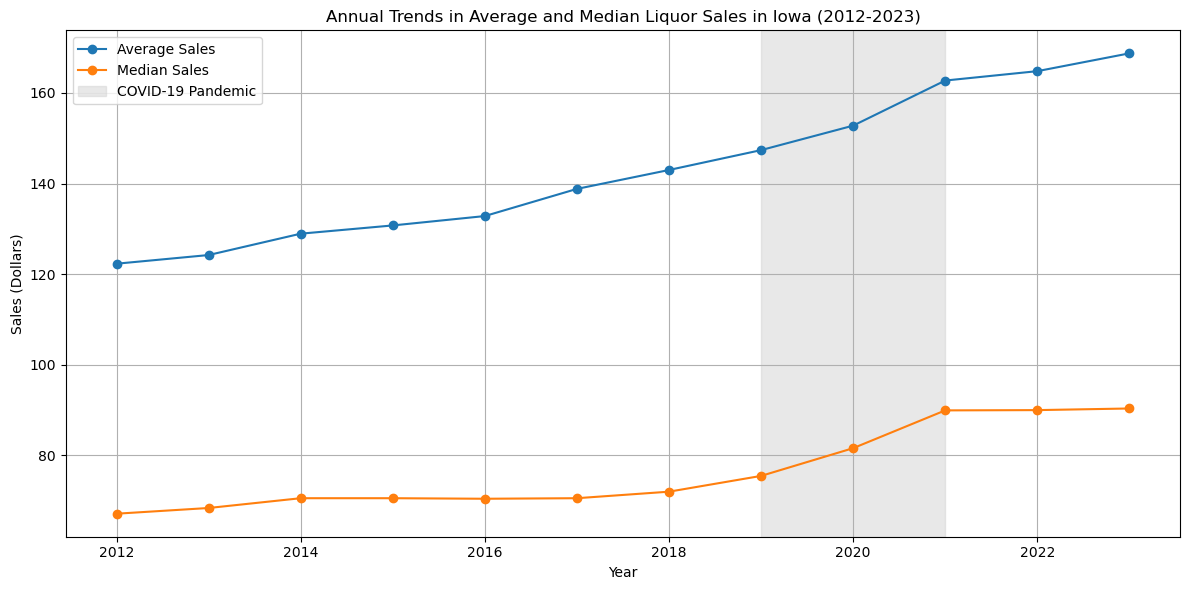

In [127]:
# Group by year and calculate the average and median liquor sales
annual_sales = ils_processed.groupby('year')['sale_dollars'].agg(['mean', 'median', 'sum']).reset_index()

# Rename columns for clarity
annual_sales.columns = ['year', 'average_sales', 'median_sales', 'sum_sales']

# Plot line charts for average and median liquor sales
plt.figure(figsize=(12, 6))

# Plot for average liquor sales
plt.plot(annual_sales['year'], annual_sales['average_sales'], label='Average Sales', marker='o')

# Plot for median liquor sales
plt.plot(annual_sales['year'], annual_sales['median_sales'], label='Median Sales', marker='o')

# Plot for median liquor sales
# plt.plot(annual_sales['year'], annual_sales['sum_sales'], label='Sum Sales', marker='o')

# Highlight the COVID-19 pandemic period (2019-2021)
plt.axvspan(2019, 2021, color='lightgrey', alpha=0.5, label='COVID-19 Pandemic')

# Set plot titles and labels
plt.title('Annual Trends in Average and Median Liquor Sales in Iowa (2012-2023)')
plt.xlabel('Year')
plt.ylabel('Sales (Dollars)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### How do the monthly patterns of liquor sales in Iowa vary when visualizing the total volume sold (in Liters) with a horizontal bar plot? Furthermore, what insights can be gained from a vertical bar plot depicting the distribution of average sales (in Dollars) by days? 

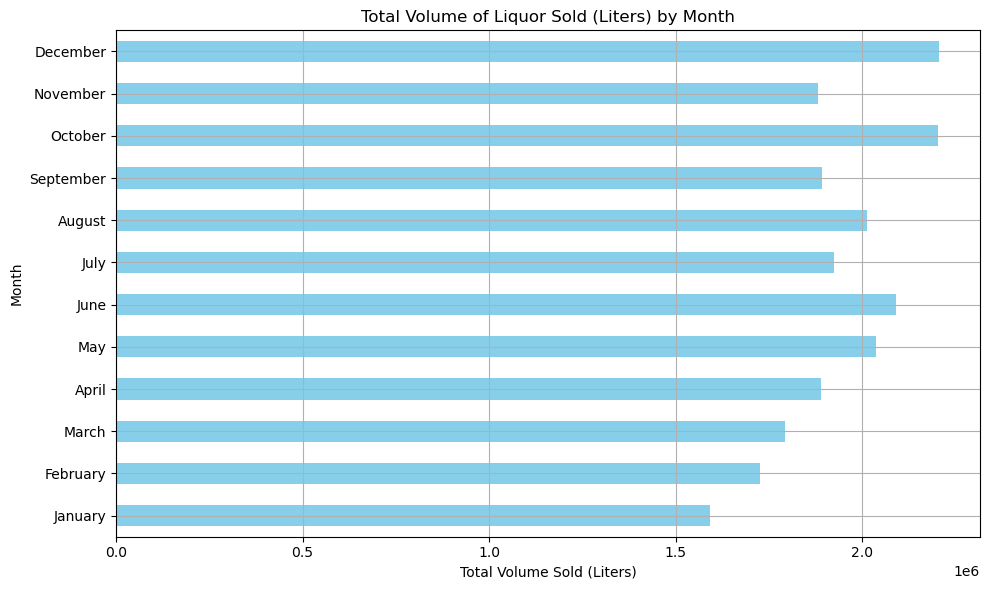

In [128]:
# Group by month and calculate the total volume sold
monthly_volume = ils_processed.groupby('month_name')['volume_sold_liters'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Create a horizontal bar plot for total volume sold by month
plt.figure(figsize=(10, 6))
monthly_volume.plot(kind='barh', color='skyblue')
plt.title('Total Volume of Liquor Sold (Liters) by Month')
plt.xlabel('Total Volume Sold (Liters)')
plt.ylabel('Month')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

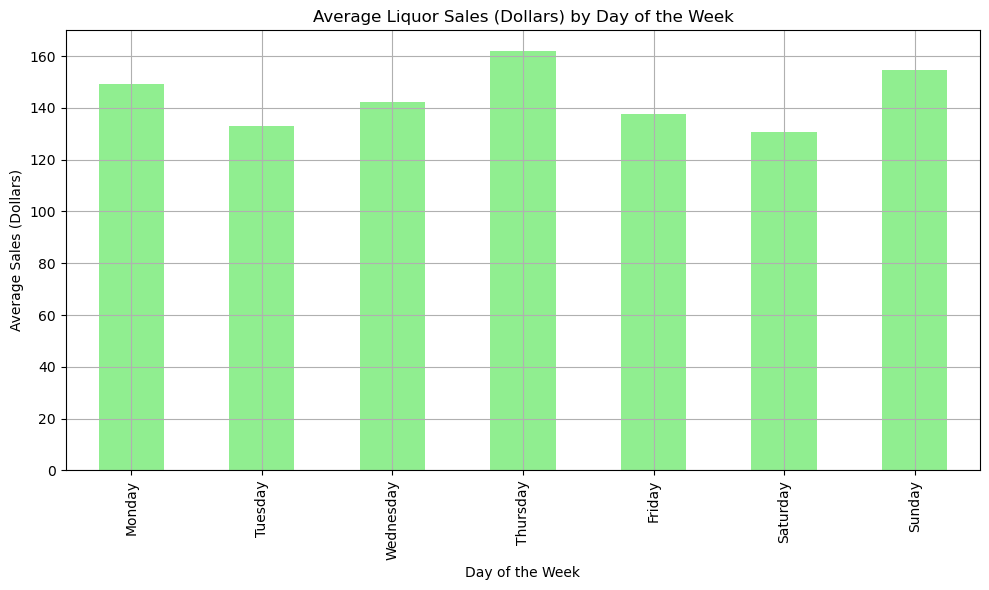

In [129]:
# Group by day_name and calculate the average sales
daily_sales = ils_processed.groupby('day_name')['sale_dollars'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Create a vertical bar plot for average sales by day of the week
plt.figure(figsize=(10, 6))
daily_sales.plot(kind='bar', color='lightgreen')
plt.title('Average Liquor Sales (Dollars) by Day of the Week')
plt.ylabel('Average Sales (Dollars)')
plt.xlabel('Day of the Week')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


### Discover the top 10 counties in Iowa with the highest and lowest number of bottles sold. Use a pie chart to visualize the distribution, providing insights into both significant contributors and areas with lower sales among the counties.

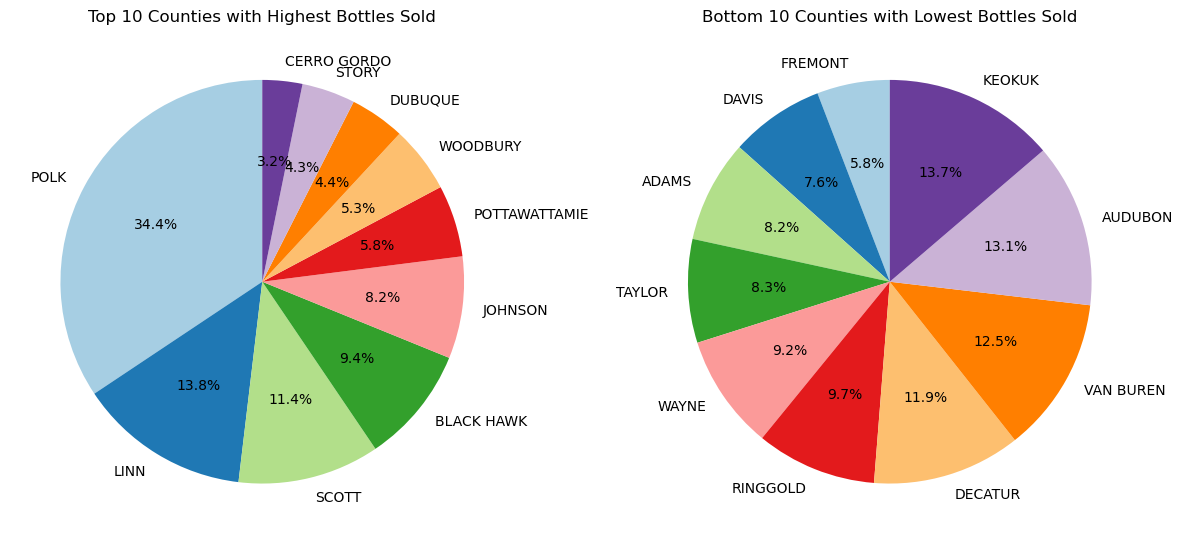

In [130]:
# Group by 'county' and calculate the total number of bottles sold
county_bottles = ils_processed.groupby('county')['bottles_sold'].sum().reset_index()

# Sort the counties by number of bottles sold (highest and lowest)
top_10_counties = county_bottles.nlargest(10, 'bottles_sold')
bottom_10_counties = county_bottles.nsmallest(10, 'bottles_sold')

# Pie chart for the top 10 counties with the highest number of bottles sold
plt.figure(figsize=(12, 6))

# Plot for top 10 counties
plt.subplot(1, 2, 1)
plt.pie(top_10_counties['bottles_sold'], labels=top_10_counties['county'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 10 Counties with Highest Bottles Sold')

# Plot for bottom 10 counties
plt.subplot(1, 2, 2)
plt.pie(bottom_10_counties['bottles_sold'], labels=bottom_10_counties['county'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Bottom 10 Counties with Lowest Bottles Sold')
plt.tight_layout()
plt.show()


### Create a scatter plot visualizing the relationship between 'State Bottle Retail' and 'Volume Sold (Gallons)' in Iowa liquor sales. Explore the correlation between these two columns to understand if and how they are related. 

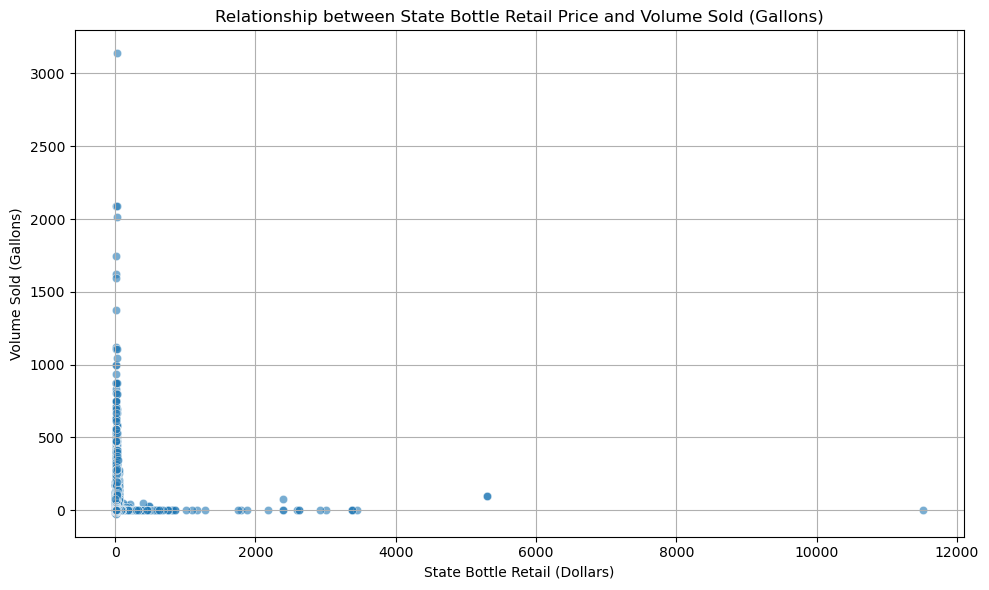

Correlation between State Bottle Retail and Volume Sold (Gallons): 0.00


In [131]:
# Scatter plot to visualize the relationship between state_bottle_retail and volume_sold_gallons
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_bottle_retail', y='volume_sold_gallons', data=ils_processed, alpha=0.6)

# Set plot title and labels
plt.title('Relationship between State Bottle Retail Price and Volume Sold (Gallons)')
plt.xlabel('State Bottle Retail (Dollars)')
plt.ylabel('Volume Sold (Gallons)')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Correlation between state_bottle_retail and volume_sold_gallons
correlation = ils_processed['state_bottle_retail'].corr(ils_processed['volume_sold_gallons'])
print(f"Correlation between State Bottle Retail and Volume Sold (Gallons): {correlation:.2f}")


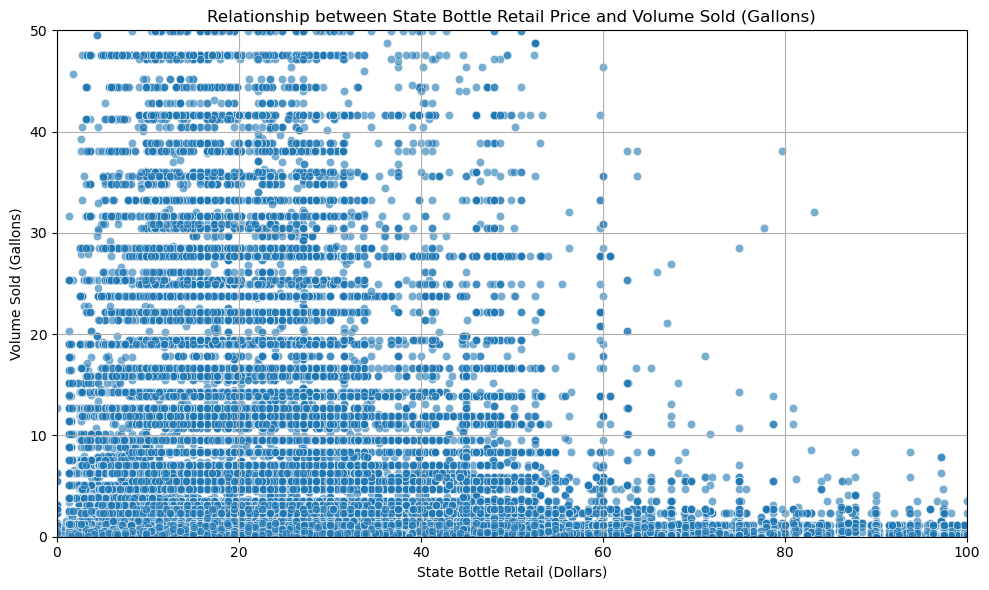

Correlation between State Bottle Retail and Volume Sold (Gallons): 0.00


In [132]:
# Scatter plot to visualize the relationship between 'State Bottle Retail' and 'Volume Sold (Gallons)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='state_bottle_retail', y='volume_sold_gallons', data=ils_processed, alpha=0.6)

# Set plot title and labels
plt.title('Relationship between State Bottle Retail Price and Volume Sold (Gallons)')
plt.xlabel('State Bottle Retail (Dollars)')
plt.ylabel('Volume Sold (Gallons)')

# Set x-axis and y-axis limits to isolate the outliers (you can adjust these values)
plt.xlim(0, 100)  # Limit the state_bottle_retail price to $0 - $100
plt.ylim(0, 50)   # Limit the volume_sold_gallons to 0 - 50 gallons

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Correlation between state_bottle_retail and volume_sold_gallons
correlation = ils_processed['state_bottle_retail'].corr(ils_processed['volume_sold_gallons'])
print(f"Correlation between State Bottle Retail and Volume Sold (Gallons): {correlation:.2f}")


### Let $Q1, Q3,$ and $IQR$ be the first quartile, third quartile and the interquartile range. Any data point lower than $Q1 - 1.5 IQR$ or higher than $Q3 + 1.5 IQR$ is an outlier. Using this formula, find two numerical variables that have the highest number of outliers. Use the box plot to verify that what you just saw is correct.

In [133]:
["bottle_volume_ml", "state_bottle_cost", "state_bottle_retail", "bottles_sold", "sale_dollars", "volume_sold_liters", "volume_sold_gallons", "sale_cost"]

['bottle_volume_ml',
 'state_bottle_cost',
 'state_bottle_retail',
 'bottles_sold',
 'sale_dollars',
 'volume_sold_liters',
 'volume_sold_gallons',
 'sale_cost']

In [135]:
# Define the numerical columns to analyze
numerical_columns = ["bottle_volume_ml", "state_bottle_cost", "state_bottle_retail", 
                     "bottles_sold", "sale_dollars", "volume_sold_liters", "volume_sold_gallons", "sale_cost"]

# Create a dictionary to store the number of outliers for each column
outlier_counts = {}

# Calculate the number of outliers for each column
for col in numerical_columns:
    Q1 = ils_processed[col].quantile(0.25)  # First quartile (Q1)
    Q3 = ils_processed[col].quantile(0.75)  # Third quartile (Q3)
    IQR = Q3 - Q1  # Interquartile range (IQR)
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count the number of outliers in the column
    outliers = ils_processed[(ils_processed[col] < lower_bound) | (ils_processed[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Sort the columns by the number of outliers in descending order
sorted_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 2 columns with the highest number of outliers
top_2_outlier_columns = [col for col, count in sorted_outliers[:2]]

# Display the top 2 columns with their number of outliers
print(f"Top 2 variables with the highest number of outliers: {top_2_outlier_columns}")

Top 2 variables with the highest number of outliers: ['bottle_volume_ml', 'sale_dollars']


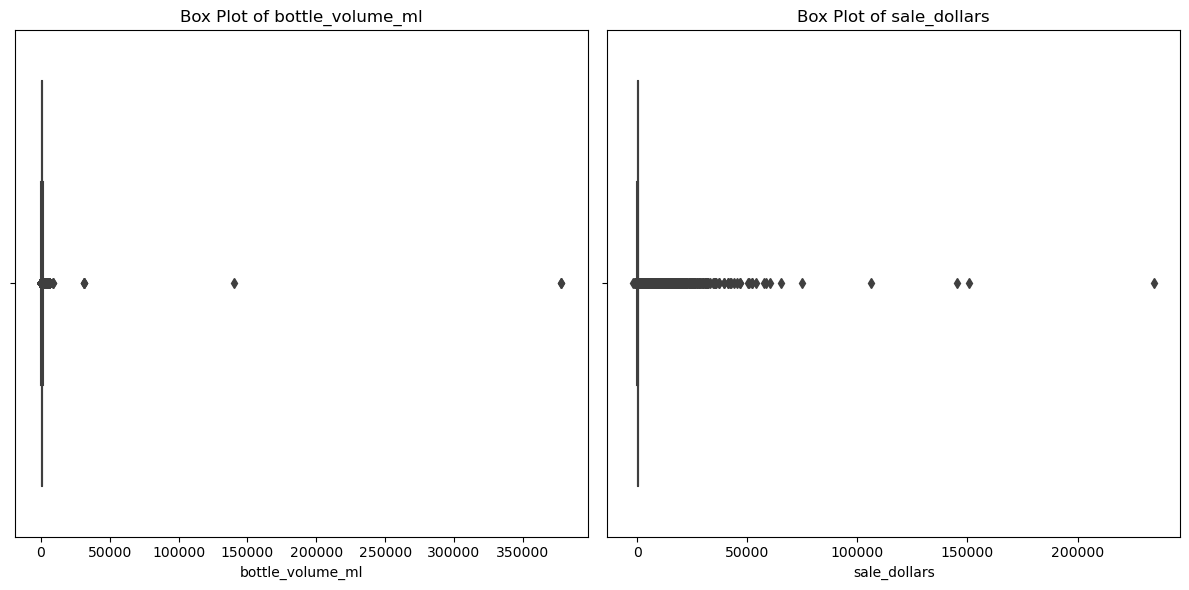

In [136]:
# Create box plots for the two variables with the highest number of outliers
plt.figure(figsize=(12, 6))

# First variable box plot
plt.subplot(1, 2, 1)
sns.boxplot(x=ils_processed[top_2_outlier_columns[0]])
plt.title(f'Box Plot of {top_2_outlier_columns[0]}')

# Second variable box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=ils_processed[top_2_outlier_columns[1]])
plt.title(f'Box Plot of {top_2_outlier_columns[1]}')

# Display the plots
plt.tight_layout()
plt.show()

### Problem 4. 
Utilize the cleaned data from Problem 1 for this problem. Use the columns listed below with their updated names listed below to filter the data before proceeding.

* If you want to make a linear regression model, how do you designate the target variable (y) and determine the features (x) in the data you just created? Explain your rationale. Explore and explain also the categorical variables that can be used in the regression model by using dummy coding techniques.

* Based on your considerations in part a, make a regression model by selecting features and targets using your preferred method (OLS, Decision Tree, SVM, Random Forest, KNN). Feature selection may involve criteria such as p-values or correlation. Allocate 25% of the data for testing. Provide the training and testing R-squared values and RMSE.

* With the data above in this problem, use the "Category Name" column and extract the top 5 category names from the data. Remove all the rows that do not have these top 5 category names. This column serves as the target variable for the classification model you will be making. For features, use those used in the regression above and adjust based on your analysis.

* Make a classification model with "Category Name" as the target variable, using one of the ML methods of your choice (Decision Tree, SVM, Random Forest, KNN). Allocate 25% of the data for testing. Report training and testing accuracy scores. Generate a heatmap of the confusion matrix for the testing data.

* What methods and techniques can you think of if you want to improve the scores and metrics in parts 2 and 4 above? There is no need to make any model here.

In [46]:
columns = ['Zip Code', 'County','Category Name', 'Vendor Name', 
           'Item Description', 'Pack', 'Bottle Volume (ml)',
           'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
           'Sale (Dollars)', 'Volume Sold (Liters)', 
           'Volume Sold (Gallons)','Year', 'Month', 'Day']

### If you want to make a linear regression model, how do you designate the target variable (y) and determine the features (x) in the data you just created? Explain your rationale. Explore and explain also the categorical variables that can be used in the regression model by using dummy coding techniques.

You designate the variable (y) according to the business question you're trying to answer. The target variable should represent a key outcome that, if predicted accurately, can inform business decisions and strategies. In this case, features like 'Bottle Sold', 'Sale (Dolllars)', or even 'Category Name' have potential to be valueble information for liquor stores to have beforehand.

The features (X) are the variables that are used to explain or predict the target variable. Finding linear relationships between these features and the target can be challenging but valuable when discovered. These relationships allow us to explain the behavior of the target variable using statistical techniques like regression. And by exploring relationships between these features and the target, we can improve model accuracy and predictive power.

Categorical variables can be just as important as numerical variables in explaining the behavior of the target feature. For example, days of the week, which some days may constantly see higher sales than others, and encoding this trend allows the model to learn and predict better. Same applies for months of the year, once sales may peak during holidays or specific seasons, and accounting for these patterns improves prediction. In order to do so, many use thechniques such as Dummy coding (one-hot encoding), which allows categorical variables to be included in the model. Each category (e.g., each day or month) is represented by a binary (0 or 1) feature, enabling the model to learn patterns specific to certain categories.

### Based on your considerations in part a, make a regression model by selecting features and targets using your preferred method (OLS, Decision Tree, SVM, Random Forest, KNN). Feature selection may involve criteria such as p-values or correlation. Allocate 25% of the data for testing. Provide the training and testing R-squared values and RMSE.

In [47]:
ils_processed.head()

,invoice_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,latitude,longitude,year,month,day,day_name,sale_cost,profit_percentage
0,RINV-05018600024,2023-12-11,4698,QUALITY QUICK STOP / FAIRFIELD,201 WEST BURLINGTIN AVE.,FAIRFIELD,52556,POINT (-91.965393979 41.006794),77,JEFFERSON,1022200,100% AGAVE TEQUILA,619,CAMPARI AMERICA,87619,ESPOLON BLANCO,12,750,16.00,24.00,-6.0,-144.00,-4.50,-1.18,-91.965394,41.006794,2023,12,11,Monday,-96.00,50.000000
1,S27341700031,2015-08-17,2487,ANAMOSA FAMILY FOODS,402 EAST MAIN,ANAMOSA,52205,POINT (-91.281344 42.108275),53,JONES,1062300,FLAVORED RUM,35,"BACARDI U.S.A., INC.",43137,BACARDI LIMON,12,1000,9.50,14.25,3.0,42.75,3.00,0.79,-91.281344,42.108275,2015,8,17,Monday,28.50,50.000000
2,S06461900038,2012-07-09,2622,HY-VEE FOOD STORE / IOWA CITY,1125 N DODGE ST,IOWA CITY,52240,POINT (-91.518868 41.676095),52,JOHNSON,1012100,CANADIAN WHISKIES,65,JIM BEAM BRANDS,15248,WINDSOR CANADIAN PET,6,1750,8.92,13.38,6.0,80.28,10.50,2.77,-91.518868,41.676095,2012,7,9,Monday,53.52,50.000000
3,INV-07548000052,2017-10-02,4559,OSAGE PAYLESS FOODS,633 CHASE ST,OSAGE,50461.0,POINT (-92.811539 43.285134),66,MITCHELL,1041100,AMERICAN DRY GINS,55,SAZERAC NORTH AMERICA,30056,FLEISCHMANN'S GIN,12,750,3.32,4.98,1.0,4.98,0.75,0.20,-92.811539,43.285134,2017,10,2,Monday,3.32,50.000000
4,S17673000080,2014-03-03,2588,HY-VEE FOOD AND DRUG #6 / CEDAR RAPI,4035 MT. VERNON ROAD S.E.,CEDAR RAPIDS,52403,POINT (-91.60978 41.976835),57,LINN,1031200,VODKA FLAVORED,260,DIAGEO AMERICAS,41715,SMIRNOFF CRANBERRY VODKA,12,750,8.25,12.37,3.0,37.11,2.25,0.59,-91.609780,41.976835,2014,3,3,Monday,24.75,49.939394


In [48]:
polk = ils_processed[ils_processed['county'] == 'POLK'].sort_values(by=['date'], ascending=True).reset_index(drop=True)
polk = polk[['year', 'month', 'day', 'day_name', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'volume_sold_liters', 'volume_sold_gallons', 'sale_dollars']]
polk = pd.get_dummies(polk, columns=['day_name'], drop_first=True, dtype=int)
print(polk.shape)
polk.tail()

(483023, 16)


,year,month,day,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,sale_dollars,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
483018,2023,12,30,750,5.50,8.25,6.0,4.5,1.18,49.50,0,1,0,0,0,0
483019,2023,12,30,750,69.92,104.88,6.0,4.5,1.18,629.28,0,1,0,0,0,0
483020,2023,12,30,1750,8.74,13.11,6.0,10.5,2.77,78.66,0,1,0,0,0,0
483021,2023,12,30,750,17.54,26.31,6.0,4.5,1.18,157.86,0,1,0,0,0,0
483022,2023,12,30,750,12.50,18.75,12.0,9.0,2.37,225.00,0,1,0,0,0,0


In [49]:
# Split data into train and test
train_size = round(polk.shape[0] * 0.75)
polk_train = polk[:train_size]
polk_test = polk[train_size:]

# Separate the features (X) and target (y) for both train and test sets
X_train = polk_train.drop(columns=['sale_dollars'])
y_train = polk_train['sale_dollars']

X_test = polk_test.drop(columns=['sale_dollars'])
y_test = polk_test['sale_dollars']

# Confirm the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 362267
Testing set size: 120756


In [50]:

# Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [51]:
# Calculate R-squared and RMSE for the training data
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate R-squared and RMSE for the testing data
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Display the results
print(f'Training R-squared: {r2_train:.4f}')
print(f'Training RMSE: {rmse_train:.4f}')
print(f'Testing R-squared: {r2_test:.4f}')
print(f'Testing RMSE: {rmse_test:.4f}')

Training R-squared: 0.9926
Training RMSE: 52.1016
Testing R-squared: 0.7278
Testing RMSE: 511.8619


### With the data above in this problem, use the "Category Name" column and extract the top 5 category names from the data. Remove all the rows that do not have these top 5 category names. This column serves as the target variable for the classification model you will be making. For features, use those used in the regression above and adjust based on your analysis.

In [61]:
top_5_categories = ils_processed['category_name'].value_counts().nlargest(5).index
top_5_categories

Index(['AMERICAN VODKAS', 'CANADIAN WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'SPICED RUM', 'WHISKEY LIQUEUR'],
      dtype='object', name='category_name')

In [68]:
top_5_df = ils_processed[ils_processed['category_name'].isin(top_5_categories)].sort_values(by=['date'], ascending=True).reset_index(drop=True)
top_5_df = top_5_df[['year', 'month', 'day', 'day_name', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'volume_sold_liters', 'volume_sold_gallons', 'sale_dollars', 'category_name']]
top_5_df = pd.get_dummies(top_5_df, columns=['day_name'], drop_first=True, dtype=int)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
top_5_df['category_name_numreic'] = label_encoder.fit_transform(top_5_df['category_name'])
top_5_df = top_5_df.drop(columns=['category_name'])

# Display the mapping of the labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

top_5_df.head()

{'AMERICAN VODKAS': 0, 'CANADIAN WHISKIES': 1, 'SPICED RUM': 2, 'STRAIGHT BOURBON WHISKIES': 3, 'WHISKEY LIQUEUR': 4}


,year,month,day,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,sale_dollars,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday,category_name_numreic
0,2012,1,3,750,4.83,7.44,12.0,9.00,2.38,89.28,0,0,0,0,1,0,1
1,2012,1,3,375,2.65,3.97,2.0,0.75,0.20,7.94,0,0,0,0,1,0,3
2,2012,1,3,300,5.99,8.99,2.0,0.60,0.16,17.98,0,0,0,0,1,0,1
3,2012,1,3,750,8.50,12.74,12.0,9.00,2.38,152.88,0,0,0,0,1,0,2
4,2012,1,3,750,4.83,7.44,12.0,9.00,2.38,89.28,0,0,0,0,1,0,1


### Make a classification model with "Category Name" as the target variable, using one of the ML methods of your choice (Decision Tree, SVM, Random Forest, KNN). Allocate 25% of the data for testing. Report training and testing accuracy scores. Generate a heatmap of the confusion matrix for the testing data.

In [72]:
# Split data into train and test
train_size = round(top_5_df.shape[0] * 0.75)
top_5_train = top_5_df[:train_size]
top_5_test = top_5_df[train_size:]

# Separate the features (X) and target (y) for both train and test sets
X_train = top_5_train.drop(columns=['category_name_numreic'])
y_train = top_5_train['category_name_numreic']

X_test = top_5_test.drop(columns=['category_name_numreic'])
y_test = top_5_test['category_name_numreic']

# Confirm the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')

Training set size: 671058
Testing set size: 223686


Training Accuracy: 0.9941
Testing Accuracy: 0.7647


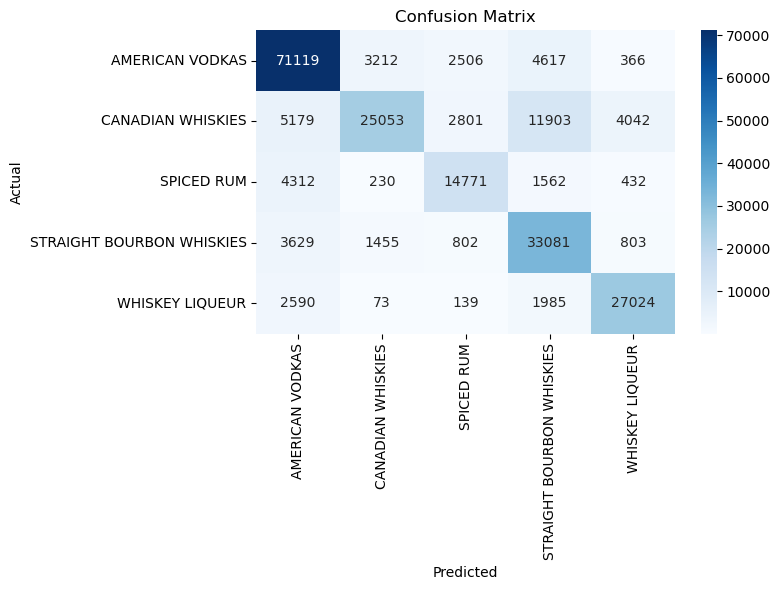

In [74]:


# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 5: Predict the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Step 6: Calculate and print training and testing accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Step 7: Generate a confusion matrix for the testing data
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Step 8: Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

### What methods and techniques can you think of if you want to improve the scores and metrics in parts 2 and 4 above? There is no need to make any model here.

Starting from data curation, which is often underestimated in the modeling cycle. There’s a well-known saying in the modeling world, “Garbage in, garbage out.” Even though we’ve identified some data gaps, there are likely still opportunities for improvement. Ensuring high-quality, well-prepared data is the foundation of a successful model. Issues such as missing data, outliers, or inconsistent formatting need to be addressed thoroughly.

Feature engineering is another area that could be further explored. The more data exploration is conducted, the better the understanding of underlying relationships among features, which can then be exploited through feature engineering. This is also a great opportunity to inject domain knowledge from business owners, which can lead to the creation of features that are not immediately obvious from the raw data but are critical for improving model performance.

Then, on the modeling side, we have:
* Feature selection to reduce noise and improve model interpretability by focusing on the most important features.
* Model selection and fine-tuning to ensure that the chosen model is well-suited to the problem and optimized through techniques like cross-validation, hyperparameter tuning, and regularization.

These steps together form a continuous process of refinement that is key to creating robust and accurate models.

### Problem 5. 
You will use the data from problem 4 for this problem. Remove all categorical columns and retain only numerical columns for clustering.

* Determine the optimal number of clusters by emploing methods like the elbow method or silhouette analysis to identify the optimal number of clusters. Clearly explain the reasoning behind your choice of the optimal number.

* Create a K-means clustering model by utilizing the optimal number of clusters from step 1. Implement random seeding to ensure the reproducibility of cluster labels.

* Append a new column named "Clusters" containing the assigned cluster labels for each data point to the cleaned dataset ( from problem 1).

* Discover five new previously unknown insights about the ILS data using the cluster labels along with other relevant columns (e.g., Month, Day, Year, Category Name, Zip Codes, Price, and quantity-related columns).

* Explain the absence of the test-train split method and the accuracy scores in the clustering model you just made. Compare and contrast clustering's unsupervised nature with the supervised approaches of regression and classification.

### Determine the optimal number of clusters by emploing methods like the elbow method or silhouette analysis to identify the optimal number of clusters. Clearly explain the reasoning behind your choice of the optimal number.

In [76]:
cluster_df = ils_processed[['bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'volume_sold_liters', 'volume_sold_gallons', 'sale_dollars']]
cluster_df.head()

,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,volume_sold_liters,volume_sold_gallons,sale_dollars
0,750,16.00,24.00,-6.0,-4.50,-1.18,-144.00
1,1000,9.50,14.25,3.0,3.00,0.79,42.75
2,1750,8.92,13.38,6.0,10.50,2.77,80.28
3,750,3.32,4.98,1.0,0.75,0.20,4.98
4,750,8.25,12.37,3.0,2.25,0.59,37.11


In [78]:


# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cluster_df)
scaled_df

array([[-0.2111923 ,  0.47321372,  0.47265861, ..., -0.38110951,
        -0.379899  , -0.56855873],
       [ 0.19396278, -0.09553367, -0.0961392 , ..., -0.17199255,
        -0.17197598, -0.20045477],
       [ 1.40942803, -0.14628343, -0.14689347, ...,  0.03712441,
         0.03700248, -0.12647918],
       ...,
       [-0.2111923 ,  0.65608788,  0.65584067, ..., -0.19290424,
        -0.19308492, -0.12423212],
       [ 1.40942803, -0.35803246, -0.35866127, ...,  0.03712441,
         0.03700248, -0.16940986],
       [ 0.19396278, -0.58378142, -0.58443024, ...,  0.07894781,
         0.07922035, -0.14563832]])

/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gabrielvictorgomesferreira/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

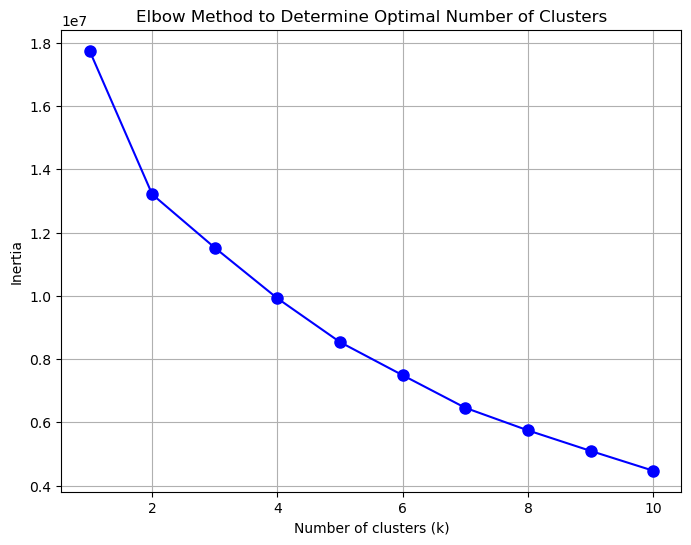

In [80]:


# Perform KMeans clustering with varying number of clusters
inertia = []
k_values = range(1, 11)  # Trying different cluster numbers from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()

### Create a K-means clustering model by utilizing the optimal number of clusters from step 1. Implement random seeding to ensure the reproducibility of cluster labels.

### Append a new column named "Clusters" containing the assigned cluster labels for each data point to the cleaned dataset ( from problem 1).

### Discover five new previously unknown insights about the ILS data using the cluster labels along with other relevant columns (e.g., Month, Day, Year, Category Name, Zip Codes, Price, and quantity-related columns).

### Explain the absence of the test-train split method and the accuracy scores in the clustering model you just made. Compare and contrast clustering's unsupervised nature with the supervised approaches of regression and classification.

In [23]:
# Your solution code goes here. Add more cells as needed.

In [24]:
# Use this cell to reflect on this HW. Also explain the extent of
# AI tools use you made in each of the problem above.